## Decision Tree Regressor

#### Importing dependent libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head(3)

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0  7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1  7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2  6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500

In [10]:
df.shape

(550, 9)

In [12]:
df = df.dropna()

In [13]:
df.shape

(549, 9)

In [14]:
X = df.iloc[:,:-1] #Independent feature
Y = df.iloc[:,-1] #Dependent feature

In [15]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.967862  0.965157 -0.889020 -0.524467  0.608045  0.346485   
TM      0.967862  1.000000  0.901475 -0.835683 -0.612395  0.605626  0.342980   
Tm      0.965157  0.901475  1.000000 -0.901673 -0.342549  0.555229  0.327737   
SLP    -0.889020 -0.835683 -0.901673  1.000000  0.308668 -0.476347 -0.361016   
H      -0.524467 -0.612395 -0.342549  0.308668  1.000000 -0.480948 -0.416193   
VV      0.608045  0.605626  0.555229 -0.476347 -0.480948  1.000000  0.443132   
V       0.346485  0.342980  0.327737 -0.361016 -0.416193  0.443132  1.000000   
VM      0.286482  0.301275  0.252748 -0.290194 -0.380964  0.367184  0.748162   
PM 2.5 -0.629898 -0.573447 -0.665778  0.608924  0.217851 -0.729767 -0.441617   

              VM    PM 2.5  
T       0.286482 -0.629898  
TM      0.301275 -0.573447  
Tm      0.252748 -0.665778  
SLP    -0.290194  0.608924  
H      -0.380964  0.217851  
VV      0.367184 -0.729767  
V       0.748162 -0.441617  
VM      1.000000 -0.350197  
PM 2.5 -0.350197  1.000000

In [ ]:
df.isnull().counts()

### Feature importance

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)

C:\Users\AKSHU\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

### Decision Tree Regressor

C:\Users\AKSHU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


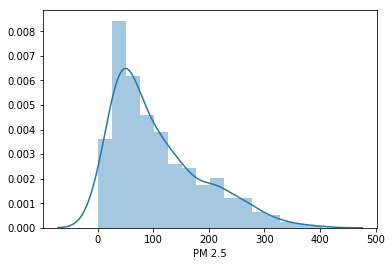

In [17]:
sns.distplot(Y)

### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state=0)


In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
dtree = DecisionTreeRegressor(criterion='mse')

In [22]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [23]:
print("Coefficient of determination R^2 <-- on train set : {}".format(dtree.score(X_train,y_train)))

Coefficient of determination R^2 <-- on train set : 1.0


In [25]:
# This means it is the case of overfiting. 
#Our model works well for traning data but fails to mentain accuract for test data
print("Coefficient of determination R^2 <-- on train set : {}".format(dtree.score(X_test,y_test)))

Coefficient of determination R^2 <-- on train set : 0.5276683228569772


In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
score = cross_val_score(dtree,X,Y,cv=5)

In [28]:
score.mean()

0.1473409027809468

### Tree Visualization

Scikit learn actually has some built-in visulazation capabilities for decision trees, you won't use this often and it requires  you to install the pydot library, but here is an example of what it looks like and the code to execute this.

In [29]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

In [32]:
##conda install pydotplus
##conda install python-graphviz
import pydotplus

In [31]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [33]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [34]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [35]:
prediction = dtree.predict(X_test)

C:\Users\AKSHU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


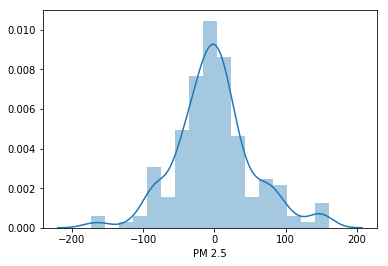

In [36]:
sns.distplot(y_test-prediction)

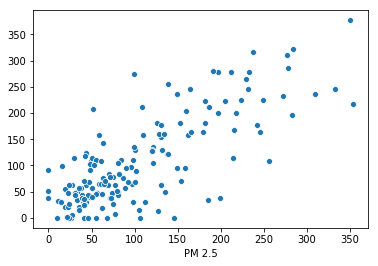

In [37]:
sns.scatterplot(y_test,prediction)

### Hyperparameter tuning decision tree Regressor

In [ ]:
DecisionTreeRegressor()

In [38]:
##Hyper parameter optimization
params = {
    "splitter" : ["best", "random"],
    "max_depth": [3,4,5,6,8,10,12,15],
    "min_samples_leaf": [1,2,3,4,5],
    "min_weight_fraction_leaf": [0.1,0.2,0.3,0.4],
    "max_features": ["auto","log2","sqrt",None],
    "max_leaf_nodes": [None,10,20,30,40,50,60,70]
}

In [40]:
##Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [41]:
random_search = GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

#### Timmer function to calculate time

In [42]:
def timer(start_time = None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken : %i hours %i minutes and %s seconds.' %(thour, tmin, round(tsec, 2)))
        

In [43]:
from datetime import datetime
#Here we go
start_time = timer(None)
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start time variable"

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1163 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3723 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 7307 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 11915 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 17547 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 24203 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 31883 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 40587 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 50315 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 61067 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 72843 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 85643 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 99467 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 10240


 Time taken : 0 hours 5 minutes and 45.13 seconds.


In [44]:
random_search.best_params_

{'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': 30,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [45]:
random_search.best_score_

-2552.880946186878

In [46]:
predictions = random_search.predict(X_test)

C:\Users\AKSHU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


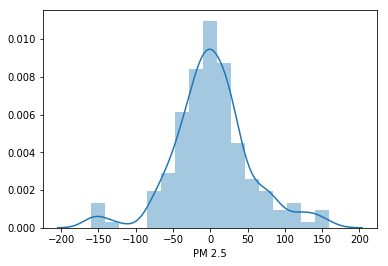

In [47]:
sns.distplot(y_test-predictions)

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 40.022777777777776
MSE: 2992.30480513468
RMSE: 54.70196344862477


In [51]:
import pickle

In [53]:
# open a file, where you ant to store the data
file = open('decisionregression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)